# Decision Tree Classification Algorithm

- 'Decision Tree' is a Supervised learning technique that can be used for both Classification and Regression 
   problems. It is a tree-structured classifier, where "internal nodes represent the features of a dataset,
   branches represent the decision rules and each leeaf node represents the outcome".

- In a Decision tree, there are two nodes,which are the 'Decision Node' and 'Leaf Node'. Decision nodes are used to 
  make any decision and have multiple branches, whereas leaf nodes are the output of those decisions and do not 
  contain any further branches.

- The decisions or test are performed on the basis of features of the given dataset.

- It is a graphical representation for getting all the possible solutions to a problem/decision based on given 
  conditions.
    
- It is called a "Decision Tree" because, similar to a tree, it starts with the root node, which expands on further 
  branches and constructs a tree-like structure.
    
- In order to build a tree, we use the 'CART algorithm', which stands for 'Classification and Regression Tree algorithm'.

- A decision tree can contain categorical data (yes/no) as well as numerical data.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png"/>

<img src=""/>

## Why use Decision Trees?

There are mainly two reasons for using the Decision trees.

* Decision Trees usually mimic human thinking ability while making a decision, so it is to understand.


* The logic behind the decision tree can be easily understand because it shows a tree like structure.

## Decision Tree Terminologies:

### * Root Node:

 The starting point of decision tree is called as 'Root node'. In this we give the whole dataset to perform 
    further actions, means it can divided into two or more homogeneous sets.
    
    
### * Leaf Node:

 Leaf nodes are the final output node, and the tree cannnot be segregated further after getting leaf node.
    
    
### * Splitting:

 Splitting is the process of dividing the decision node / root node into sub-nodes according to the given conditions.
    

### * Branch/Sub-Tree:

 A tree formed by splitting the tree.
    
    
### * pruning:

 Pruning is the process of removing the unwanted branches from the tree.
    
    
### * Parent/Child-node:

 The root node of the tree is called the 'Parent node', and the other nodes are callrd the 'Child-nodes'.
    

## Calculation Techniques:

### 1. Entropy:

 Entropy is a metric measure of the impurity in a given attribute. It specifies randomness in data.
    It can be calculated as..
        
      *  Entropy(s) = -p(yes)log2 p(yes) - p(no) log2 p(no)
        
 where,

   - S = Total number of samples
    
   - p(yes) = probability of yes

   - p(no) = probability of no

### 2. Information Gain:

- Information Gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
    
- It calculates how much information a feature provides us about a class.

- According to the value of information gain, we split the node and build the decision tree.

- A decision tree algorithm alwayes try tries to maximize the value of information gain, and node/attribute having 
  the highest information gain is split first. 
    
    It can be calculated as ..
    
     
     * Information Gain = Entropy(s) - [(weighted avg) * Entropy(each feature)]

### 3. Gini Index:

- Gini index is a measure of impurity or purity used while creating a decision tree in the 'CART algorithm'.

- An attribute with the low Gini index should be preferred as compared to the high gini index.

- It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

- Gini index can be calculated using below formula..


    * Gini Index = 1 - (summation of p)^2

## How Decision Trees works?

<img src="https://intellipaat.com/blog/wp-content/uploads/2019/06/DecisionTree.png"/>

## Advantages of the Decision Tree:

- It is simple to understand as it follows the same process which a human follows while making any decision in real-life.


- It can be very useful for solving decision related problems.


- It helps to think about all the possible outcomes for a problem.


- There is less requirement of data cleaning compared to other algorithms.


## Disadvantages of the Decision Tree:

- The decision tree contains lots of layers, which makes it complex.


- It may have an overfitting issue, which can be resolved using the 'Random Forest ALgorithm'.


- For more class labels, the computational complexity of the decision tree may increase.

In [1]:
# import required libraries

import numpy as np
import pandas as pd

In [2]:
# load titanic csv file..

df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# drop unwanted columns..

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [34]:
# here we drop the survived column from inputs and set into targets..

inputs = df.drop('Survived',axis='columns')
targets = df.Survived

In [35]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [33]:
targets.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
# here we map the sex column to give the number as male for 1 , female for 2..

inputs.Sex = inputs.Sex.map({'male':1,'female':2})
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [36]:
# to find the null values in age column..

inputs.Age[:15]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

In [11]:
# here we fill the null values by mean of age..

inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [12]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [14]:
# import train_test_split...

from sklearn.model_selection import train_test_split

In [16]:
# train and test the data..

x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.2)

In [17]:
# to find the shape of the train & test data..

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [18]:
# import decision tree from sklearn..

from sklearn import tree
model = tree.DecisionTreeClassifier()

In [19]:
# fit the model..

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
# find the accuracy score of y_test and then compared with x_test..

model.score(x_test,y_test)

0.7821229050279329

In [22]:
# to find the y_pred using x_test..

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [23]:
# find confusion matrix to the model..

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[91, 15],
       [24, 49]], dtype=int64)

In [25]:
# find the accuracy score of the y_pred and compared with y_test..

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

## Data visualisation using Heatmap:

Text(60.0, 0.5, 'True')

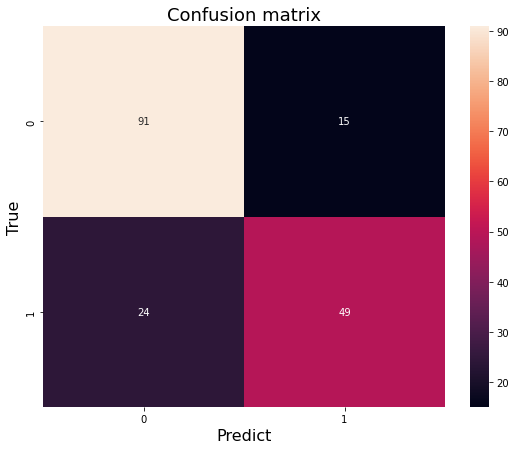

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix',size=18)
plt.xlabel('Predict',size=16)
plt.ylabel('True',size=16)